---
# Project 6-1

# YOLO_V4를 통한 객체인식 : 차량 번호판 인식

### (이미지, 비디오, 웹캠)
---

## 프로젝트 목적

한국에는 **수많은 CCTV가 존재한다. 그 중 교통관련 CCTV 수는 압도적이다. 그 외적으로 생활안전 CCTV, 사설 CCTV, 블랙박스** 등이 있다.

CCTV로부터 들어오는 수많은 영상에서 자동차와 그 정보를 알수 있으면 활용도가 높을 것이라고 봤다.

물론 지금도 많은 곳에서 활용을 하고 있다. 이번 프로젝트에서는 자동차 번호판 인식률에 관해 진행하고자 한다.

**실시간 객체 인식으로 자동차와 번호반을 구분하고, 나아가 번호판 내 문자를 인식**하여 실시간으로 출력하고자 한다.

특히, 개인 데스크탑 수준의 컴퓨팅 파워로 실시간 영상 분석을 가볍게 처리해 보려 한다.

컴퓨팅 자원이 한정적이라 고성능을 낼 순 없지만, 한정적인 자원으로 그 성능을 발현해 보려 한다.
<br>
<br>
<br>
이러한 기술이 고도화, 자동화 되어 발전된다면, 다방면에서 활용도가 높을 것이다.

    예) 교통상황 CCTV 실시간 분석 - 교통사고, 사고원인, 혼잡도, 차량조회 등이 가능해 진다.
        사고차량 블랙박스 - 사고원인, 과실
        자율주행 자동차 등등
        

    (아직 모델의 성능, 처리속도 등의 이슈가 존재한다.)

---

# 객체 탐지 (Object Detection)

 컴퓨터 비전과 이미지 처리와 관련된 컴퓨터 기술로서, 디지털 이미지와 비디오로 특정한 계열의 시맨틱 객체 인스턴스(예: 인간, 건물, 자동차)를 감지하는 일을 다룬다.

딥러닝을 활용한 객체 탐지 모델은 많지만, 대표적으로 R-CNN, SSD, YOLO 등이 있다.

객체 탐지 모델에서는 정확도와 탐지 속도가 중요하다. 빠르게 객체를 검출 하더라도 정확하지 않다면 무용지물이라고 생각했다면 다시 생각해 봐야 한다.

  - 객체 탐지 속도 : mAP (mean Average Precision) - AP(정확도) 평균
  - 초당 프레임 수 : FPS (Frame Per Second)

정확도와 mAP는 반비례 관계로 mAP가 빠르면, 정확도가 떨어지고, 정확도가 높으면 mAP가 느려진다.

다시말해, 객체를 정확하게 찾으려면 아주 강력한 컴퓨팅 파워가 아니고서는 속도를 어느정도 포기해야 한다는 말이다.

<p align="center"><img src="report_images/Comparison Yolo.png" width="640"\></p>

CNN 과 같은 일부 모델에서 정확도 향상은 높은 컴퓨팅 파워를 요한다.

그에 반해 YOLO 는 범용성을 가지고 개인의 GPU 환경에서도 괜찮은 성능을 보이기에 YOLO_V4 모델로 프로젝트를 진행했다.  
(병렬 최적화를 통해 가능하다.)

개발자에 따르면, 개인이 1080Ti, 2080Ti 와 같은 환경에서도 효율적이고 강력한 모델을 빠르고 정확하게 훈련 가능하다고 한다.

이 외에도 개발자는 많은 기술들과 구조에 대한 설명을 하고 있지만, 이번 프로젝트에서 실제 학습과 그결과를 중심으로 보고자 한다.

---
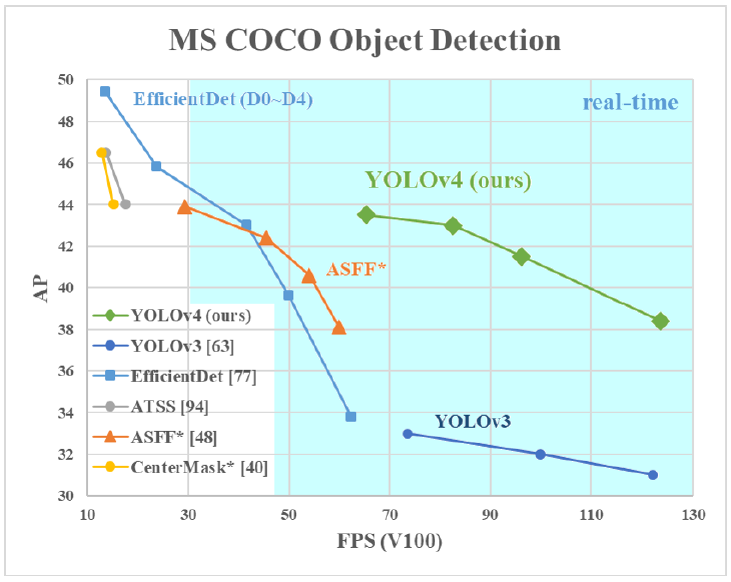

# YOLO_V4 모델 (You Only Look Once)

<p align="center"><img src="report_images/Object Detector.png" width="640"\></p>

Object Detector 는 주로 백본(Backbone)과 헤드(Head) 두 부분으로 구성 된다.

Backbone은 이미지를 feature map으로 변형시겨 주는 부분이다. ImageNet 데이터셋으로 pre-trained 시킨 VGG16, ResNet-50 등이 대표적인 Backbone이다.

Head는 Backbone에서 추출한 feature map의 location 작업을 수행하는 부분이다. 헤드에서 predict classes와 bounding boxes 작업이 수행된다.

넥(Neck)은 Backbone과 Head를 연결하는 부분으로, feature map을 refinement(정제), reconfiguration(재구성)한다.
<br>
<br>
<br>

# YOLO Detection system
<p align="center"><img src="report_images/detection_system.png" width="640"\></p>
YOLO는 이미지 픽셀, bounding box, coordinate, class probabilit 모두 single regression problem 으로 재구성해 이미지를 한 번 보는 것으로 그 안에 어떤 물체들이 있는지, 어디에 있는지 파악할 수 있다.


아래 이미지와 같이 single convolutional network가 이미지 전체에서 multiple bounding box에 대한 class probability를 계산하는 통합된 모델을 사용한다.
<p align="center"><img src="report_images/unified.png" width="640"\></p>






---
# YOLO 특징

  1. YOLO는 이미지 전체를 한번만 보는 것이다. YOLO 이전의 R-CNN은 이미지를 여러장으로 분할하고, CNN모델을 이용해 이미지를 분석했다. 그렇기 때문에 이미지 한장에서 Object Detection을 해도 실제로는 여러장의 이미지를 분석하는 것과 같았다. 하지만 YOLO는 이러한 과정 없이 이미지를 한 번만 보는 강력한 특징을 가지고 있다.  
  <br>

  
  2. 두 번째 특징은 통합된 모델을 사용하는 것이다. 기존 Object Detectin 모델은 다양한 전처리 모델과 인공 신경망을 결합해서 사용했다. 하지만 YOLO는 통합된 모델을 사용해 간단하다.  <br>
  <br>
  
  3. 세 번째 특징은 실시간으로 객체를 탐지 할 수 있는 것이다. YOLO가 유명해진 이유는 높은 성능은 아니더라도 준수한 성능으로 실시간으로 Object Detection이 가능했기 때문이다. 기존의 Faster R-CNN보다 6배 빠른 성능을 보여준다.
  <br>

---

# custom 모델 구성

  - python=3.7  
<br>
  - tensorflow-gpu=2.3.0rc0  
<br>
  - cuda = 10.1   
<br>
  - cudnn = 7.6.5  
<br>
  - cmake = 4.1.1.26  
<br>
  - visual studio = 2019   
<br>
  - GPU = GTX 1060 6GB

# 기본 학습 데이터

  - cocodata set  
  <br>
  - yolov4.weight

## coco dataset

  - 123,287 개의 이미지와 80개의 class로 구분 된 데이터셋  
  - [(https://cocodataset.org/)](https://cocodataset.org/#explore)

### Yolo는 지정된 class 이외는 탐색하지 못한다. 따라서 coco dataset 을 사용한다면 80가지 이외의 객체는 탐색하지 못한다.

---

In [ ]:
# "./data/classes/custom.names"

# 이미지 객체 검색
python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/dog.jpg

### 원본
<p align="center"><img src="report_images/dog.jpg" width="640"\></p>

### 모델 실행 후
<p align="center"><img src="report_images/detection_dog.png" width="640"\></p>

위와 같이 비디오나 실시간 웹캠의 Object Detection 도 가능하다.

In [ ]:
# 비디오 객체 검색
python detect_video.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --video ./data/video/video.mp4 --output ./detections/results.avi --count

# 저장 위치 
# D:\coding\yolov4-custom-functions-master\detections

비디오 객체 검색 
<p align="center"><img src="report_images/detection_road.png" width="640"\></p>

---

# 추가 기능

 - count : 검색된 객체가 class 별로 객체 수 파악
 <br>
 <br>
 - info : 바운딩 박스의 좌표 출력
 <br>
 <br>
 - crop : 바운딩 박스를 기준으로 crop 하여 저장
 <br>

In [ ]:
# count
python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/abbey_road.jpg --count


<p align="center"><img src="report_images/abbey_road.jpg" width="640"\></p>
<p align="center"><img src="report_images/detection_abbey_road.png" width="640"\></p>

In [ ]:
# info
python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/abbey_road.jpg --info

Object found: person, Confidence: 1.00, BBox Coords (xmin, ymin, xmax, ymax): 545.0, 161.0, 738.0, 481.0  
Object found: car, Confidence: 0.99, BBox Coords (xmin, ymin, xmax, ymax): 121.0, 148.0, 240.0, 247.0  
Object found: person, Confidence: 0.99, BBox Coords (xmin, ymin, xmax, ymax): 18.0, 160.0, 206.0, 471.0  
Object found: person, Confidence: 0.99, BBox Coords (xmin, ymin, xmax, ymax): 369.0, 180.0, 563.0, 471.0  
Object found: person, Confidence: 0.99, BBox Coords (xmin, ymin, xmax, ymax): 185.0, 165.0, 370.0, 460.0  
Object found: car, Confidence: 0.88, BBox Coords (xmin, ymin, xmax, ymax): 302.0, 136.0, 338.0, 170.0  
Object found: person, Confidence: 0.81, BBox Coords (xmin, ymin, xmax, ymax): 606.0, 131.0, 626.0, 195.0  
Object found: car, Confidence: 0.81, BBox Coords (xmin, ymin, xmax, ymax): 468.0, 134.0, 500.0, 167.0  
Object found: car, Confidence: 0.72, BBox Coords (xmin, ymin, xmax, ymax): 448.0, 129.0, 466.0, 153.0  
Object found: car, Confidence: 0.71, BBox Coords (xmin, ymin, xmax, ymax): 429.0, 123.0, 448.0, 142.0  
Object found: car, Confidence: 0.68, BBox Coords (xmin, ymin, xmax, ymax): 371.0, 123.0, 390.0, 141.0  
Object found: car, Confidence: 0.59, BBox Coords (xmin, ymin, xmax, ymax): 481.0, 140.0, 508.0, 178.0  
Object found: car, Confidence: 0.58, BBox Coords (xmin, ymin, xmax, ymax): 503.0, 128.0, 581.0, 199.0  

In [ ]:
# crop
python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/abbey_road.jpg --crop

<img src="report_images/crop/abbey_road/car_1.png">
<img src="report_images/crop/abbey_road/car_2.png">
<img src="report_images/crop/abbey_road/car_3.png">
<img src="report_images/crop/abbey_road/car_4.png">
<img src="report_images/crop/abbey_road/car_5.png">
<img src="report_images/crop/abbey_road/car_6.png">
<img src="report_images/crop/abbey_road/car_7.png">
<img src="report_images/crop/abbey_road/car_8.png">
<img src="report_images/crop/abbey_road/person_5.png"></p>
<img src="report_images/crop/abbey_road/person_1.png">
<img src="report_images/crop/abbey_road/person_2.png">
<img src="report_images/crop/abbey_road/person_3.png">
<img src="report_images/crop/abbey_road/person_4.png">


---

# Custom Data 를 이용한 Object Detection

2단계로 나누어 진행 할 것이다.

    1. 자동차 중에서도 번호판만 인식

    2. 번호판 내 문자를 인식

---
# 1. 자동차 번호판 인식
YOLOv4 를 이용하여 학습을 진행
 - Custom data : [Open Image Dataset](https://storage.googleapis.com/openimages/web/index.html) : 이미지와 bbox 정보 제공  
 <br>
 - Vehicle registration plate 이미지 1800장 (train : 1500 , val : 300)  
 <br>
 - [OIDv4_ToolKit](https://github.com/EscVM/OIDv4_ToolKit) : Open Image Dataset 의 이미지를   받아오고, 좌표를 정리

<p align="center"><img src="report_images/odi.png" width="640"\></p>

 - [YOLOv4 컨볼루션 레이어에 대한 가중치 파일](https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137)을 추가한다.  
 <br>
 - YOLOv4 는 416x416, 512x512, 608x608 크기의 size 사용하는데, 모델의 cfg 설정에서 바꿔줄 수 있다. (일종의 하이퍼파라미터 값)  
 <br>
 - 이미지의 size가 커질수록 정확도는 올라가지만 속도는 감소하게 됨으로 적절하게 선택한다.

---
## train 데이터 학습
<p align="center"><img src="report_images/training_chart.png" width="640"\></p>

  - 파란선(loss)
  - 붉은선(mAP)  
<br>
  - bset 정확도는 대략 1500 iteration 에서 나왔지만, 약 3000 iteration 이후에 평균손실은 거의 줄어들지 않음으로 이 값을 weight로 사용한다.  
<br>
  - 모델의 정확도 : yolov4-obj_bset.weights : average precision (mAP@0.50) = 0.901972, or 90.20 %
  - 모델의 정확도 : yolov4-obj_6000.weights : average precision (mAP@0.50) = 0.901395, or 90.14 %
<br>
<br>
## 인식 test
 - traing 은 외국 자동차이미지로 했으나, 비슷한 구조이므로 한국 자동차 번호판 인식 시험  
 <br>
 - 정확도 : Vehicle_registration_plate: 98%
<p align="center"><img src="report_images/kor_plate.png" width="640"\></p>

---
# 2. 번호판 내 문자인식

문자 인식을 위해서 [Tesseract](https://github.com/tesseract-ocr/tessdoc) 사용

 - Tesseract : 이미지 속 문자 인식을 하는 OCR 엔진 (3대 OCR 엔진)  
<br>
 - 이미지, text 파일을 학습해 이미지 내 문자를 인식할 수 있다.  
<br>
 - 이미 각 언어별 LSTM 학습 weight를 제공하고 있다. 하지만 한글인식은 잘 안되는 편인다.  
<br>
 - 따라서, 한글인식에 추가로 학습하고자 하였다.

# 2-1. 한글 이미지 학습
 - 국토교통부고시에 고시된 정보를 가져와 학습하였다.

<p align="center"><img src="report_images/kor_plate_num.jpg" width="640"\></p>

 - 학습에는 [jTessBoxEditor](http://vietocr.sourceforge.net/training.html) 를 사용하였다.

<p align="center"><img src="report_images/kor_plate_num2.jpg" width="640"\></p>
<p align="center"><img src="report_images/kor_plate_num3.png" width="640"\></p>

 - 이미지를 인식하고, 바운딩박스로 구획을 정해주고 학습을 진행하였다.
 
<p align="center"><img src="report_images/kor_plate_1.png" width="640"\></p>
<p align="center"><img src="report_images/val_res.png" width="640"\></p>

 - 인식은 어느 정되 되는 듯 하여 모델에 적용하려 했으나 지속적인 error 발생으로 적용하지 못하였다.

# 2-2. Yolo 모델 내 문자 인식 프로세스 (OpenCV)

 - 자동차 원본
<p align="center"><img src="report_images/cv2/lpr_demo.png" width="640"\></p>

 - 번호판 인식 
<p align="center"><img src="report_images/cv2/subimage.png" width="400"\></p>

 - 그레이 스케일 후 블러처리
<p align="center"><img src="report_images/cv2/gray.png" width="400"\></p>

 - Otsu's method (이진화 - 흑백)
<p align="center"><img src="report_images/cv2/threshold.png" width="400"\></p>

 - 윤곽을 확장하여 인식률을 높임
<p align="center"><img src="report_images/cv2/dilation.png" width="400"\></p>

In [1]:
# Tesseract OCR 번호판 인식 
def recognize_plate(img, coords):
    # 좌표 구분
    xmin, ymin, xmax, ymax = coords
    # 번호판 주변으로 5픽셀씩 추가
    box = img[int(ymin)-5:int(ymax)+5, int(xmin)-5:int(xmax)+5]
    # 그레이 스케일
    gray = cv2.cvtColor(box, cv2.COLOR_RGB2GRAY)
    # 인식률을 높이기 위해 원본 x 3 배 크기 확장
    gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
    # 블러처리로 이미지를 부드럽게
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    # Otsu's method (이진화 - 흑백) 활용해 임계값 지정
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # 확장을 위한 커널 생성
    rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    # 테두리 확장을 통해 더 선명하게 인식
    dilation = cv2.dilate(thresh, rect_kern, iterations = 1)

---
# 최종 결과

 - 자동차 이미지 - 번호판 인식 - 번호판 내 문자 인식

 

In [ ]:
# "./data/classes/custom.names"

# 이미지 번호판 인식 및 문자 인식
python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov4 --images ./data/images/car2.jpg --plate

<p align="center"><img src="report_images/last_car2.png" width="640"\></p>

In [ ]:
# 비디오 인식
python detect_video.py --weights ./checkpoints/custom-416 --size 416 --model yolov4 --video ./data/video/license_plate.mp4 --output ./detections/recognition.avi --plate

<p align="center"><img src="report_images/last_gif.gif" width="640"\></p>

In [ ]:
# 웹캠 실시간 인식
python detect_video.py --weights ./checkpoints/custom-416 --size 416 --model yolov4 --video 0 --output ./detections/results.avi --plate

<p align="center"><img src="report_images/last_cam.gif" width="640"\></p>

---
# 결론

이미지, 비디오, 실시간 웹캡 모두 자동차 번호판 자체의 인식률은 높았다.

아무리 움직여도 자동차 번호판 인식은 90% 대를 기록했다.

물론 이미지의 인식률이 가장 좋았고, 웹캠의 인식률이 떨어졌다.

(자동차 번호판 인식 + 번호판 문자 인식) 이 동시에 이루이 지면 분석에 시간이 증가 했다. (2가지 모델이 동시에 작용하니 시간복잡도가 증가) 

실시간 웹캠은 문자인식에 있어 특히 느린 모습을 보였다.  
(이는 실시간 웹캠 캡쳐 -> 이미지 분석) 의 순서가 오히려 더 시간이 적게 걸릴수도 있다.

---

학습 량의 차이가 인식률에 영향을 미칠 수가 있다. 상대적으로 번호판 인식이 더 많은 학습을 했고, 문자 인식의 경우 학습 가중의 전이학습에 실패함으로써 인식률에 악영향을 미쳤다.

프로젝트를 진행하면서 문자인식 학습에 다양한 방법을 보았지만, 실제 모두 적용하지는 못했다. 특히 번호판 문자는 양이 많이 않기 때문에 데이터 증강을 통한 다양한 학습법이 있다. 이런 방법을 사용하지 못했다.

---

앞의 여러가지 작업들은 yolo의 가장 큰 장점인 실시간 인식을 위한 발판이었다.

인식율을 떠나 yolo 같은 가벼운 모델을 사용하여 웹캠을 활용한 실시간 인식이 가능하다는 것을 알았다.

앞서 조사하던 자료중 모바일에서도 학습과 객체인식이 가능하다는 글도 보았다. 시도 해보면 좋을 듯 하다.



---
# 데이터셋

[Google AI Dataset](https://datasetsearch.research.google.com/)

[coco dataset](https://cocodataset.org/#explore)

[Open Image Dataset](https://storage.googleapis.com/openimages/web/index.html)

[aihub](https://www.aihub.or.kr/)

---
# 참고 문헌

[YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/pdf/2004.10934.pdf)

[YOLO와 CNN을 이용한 강인한 차량 번호판 인식 시스템 구현](http://ki-it.com/xml/28902/28902.pdf)

---
# 자료 출처
[darknet - yolo v4](https://github.com/pjreddie/darknet)

[labelImg](https://github.com/tzutalin/labelImg)

[ODI ToolKit - Open Image Dataset 사용](https://github.com/EscVM/OIDv4_ToolKit)

[Tesseract - 이미지에서 글자 인식](https://github.com/tesseract-ocr/tesseract)

[yolov4 weight 파일](https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights)


---
# 참고 사이트

[aiguy](https://www.youtube.com/watch?v=AAPZLK41rek&ab_channel=TheAIGuy)  
[git](https://github.com/theAIGuysCode/yolov4-custom-functions)

[Yolo V3  자동차 번호판 학습 (블로그)](https://blog.naver.com/hyunmonn/222090612827)

[Object Detection - YOLO v4 (블로그)](https://deepflowest.tistory.com/181)

[YOLO v4 custom데이터 훈련 (블로그)](https://keyog.tistory.com/22)

[darknet custom 학습하기 (블로그)](https://eehoeskrap.tistory.com/370)

[객체 인식 YOLO v5 설치 및 사용 (블로그)](https://daddynkidsmakers.blogspot.com/2021/04/yolo-v5-install-and-run.html)

[객체 탐색 모델 별 장단점 (블로그)](https://pseudo-lab.github.io/Tutorial-Book/chapters/object-detection/Ch1-Object-Detection.html)

[YOLO v4 논문 리뷰 (블로그)](https://ropiens.tistory.com/33)

[YOLO v4 특징 및 장단점 (블로그)](https://ctkim.tistory.com/91)

[국토교통부 - 자동차 등록번호판 등의 기준에 관한 고시](http://www.molit.go.kr/USR/I0204/m_45/dtl.jsp?gubun=&search=&search_dept_id=&search_dept_nm=&old_search_dept_nm=&psize=10&search_regdate_s=&search_regdate_e=&srch_usr_nm=&srch_usr_num=&srch_usr_year=&srch_usr_titl=&srch_usr_ctnt=&lcmspage=1&idx=15976)

---